In [1]:
import pandas as pd
df = pd.read_csv("laptop_price.csv", encoding="latin-1")

In [2]:
df = df.drop("Product", axis=1)

In [3]:
df = df.join(pd.get_dummies(df.Company))
df = df.drop("Company", axis=1)

In [4]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[-1])

In [5]:
df.drop("ScreenResolution", axis=1)

,laptop_ID,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,Screen Width,Screen Height
0,1,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,0,0,2560,1600
1,2,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,0,0,0,0,1440,900
2,3,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,0,0,0,0,0,1920,1080
3,4,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,0,0,0,0,0,0,0,0,2880,1800
4,5,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,0,0,0,0,0,0,0,0,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,...,0,0,0,0,0,0,0,0,1920,1080
1299,1317,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,...,0,0,0,0,0,0,0,0,3200,1800
1300,1318,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,...,0,0,0,0,0,0,0,0,1366,768
1301,1319,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,...,0,0,0,0,0,0,0,0,1366,768


In [6]:
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])

In [7]:
df = df.drop("Cpu", axis=1)

In [8]:
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [9]:
df["Ram"] = df["Ram"].str[:-2]

In [10]:
df["Ram"] = df["Ram"].astype("int")
df["CPU Frequency"] = df["CPU Frequency"].astype("float")

In [11]:
df["Screen Width"] = df["Screen Width"].astype("int")
df["Screen Height"] = df["Screen Height"].astype("int")


In [12]:
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [13]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [14]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [15]:
df = df.drop("Memory", axis=1)

In [16]:
df["Weight"] = df["Weight"].str[:-2]

In [17]:
df["Weight"] = df["Weight"].astype("float")

In [18]:
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])

In [19]:
df = df.drop("Gpu", axis=1)

In [20]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [21]:
cpu_categories = pd.get_dummies(df["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [22]:
cpu_categories = pd.get_dummies(df["GPU Brand"])
cpu_categories.columns = [col + "_GPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("GPU Brand", axis=1)

/tmp/ipykernel_7221/3186949084.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")


<Axes: >

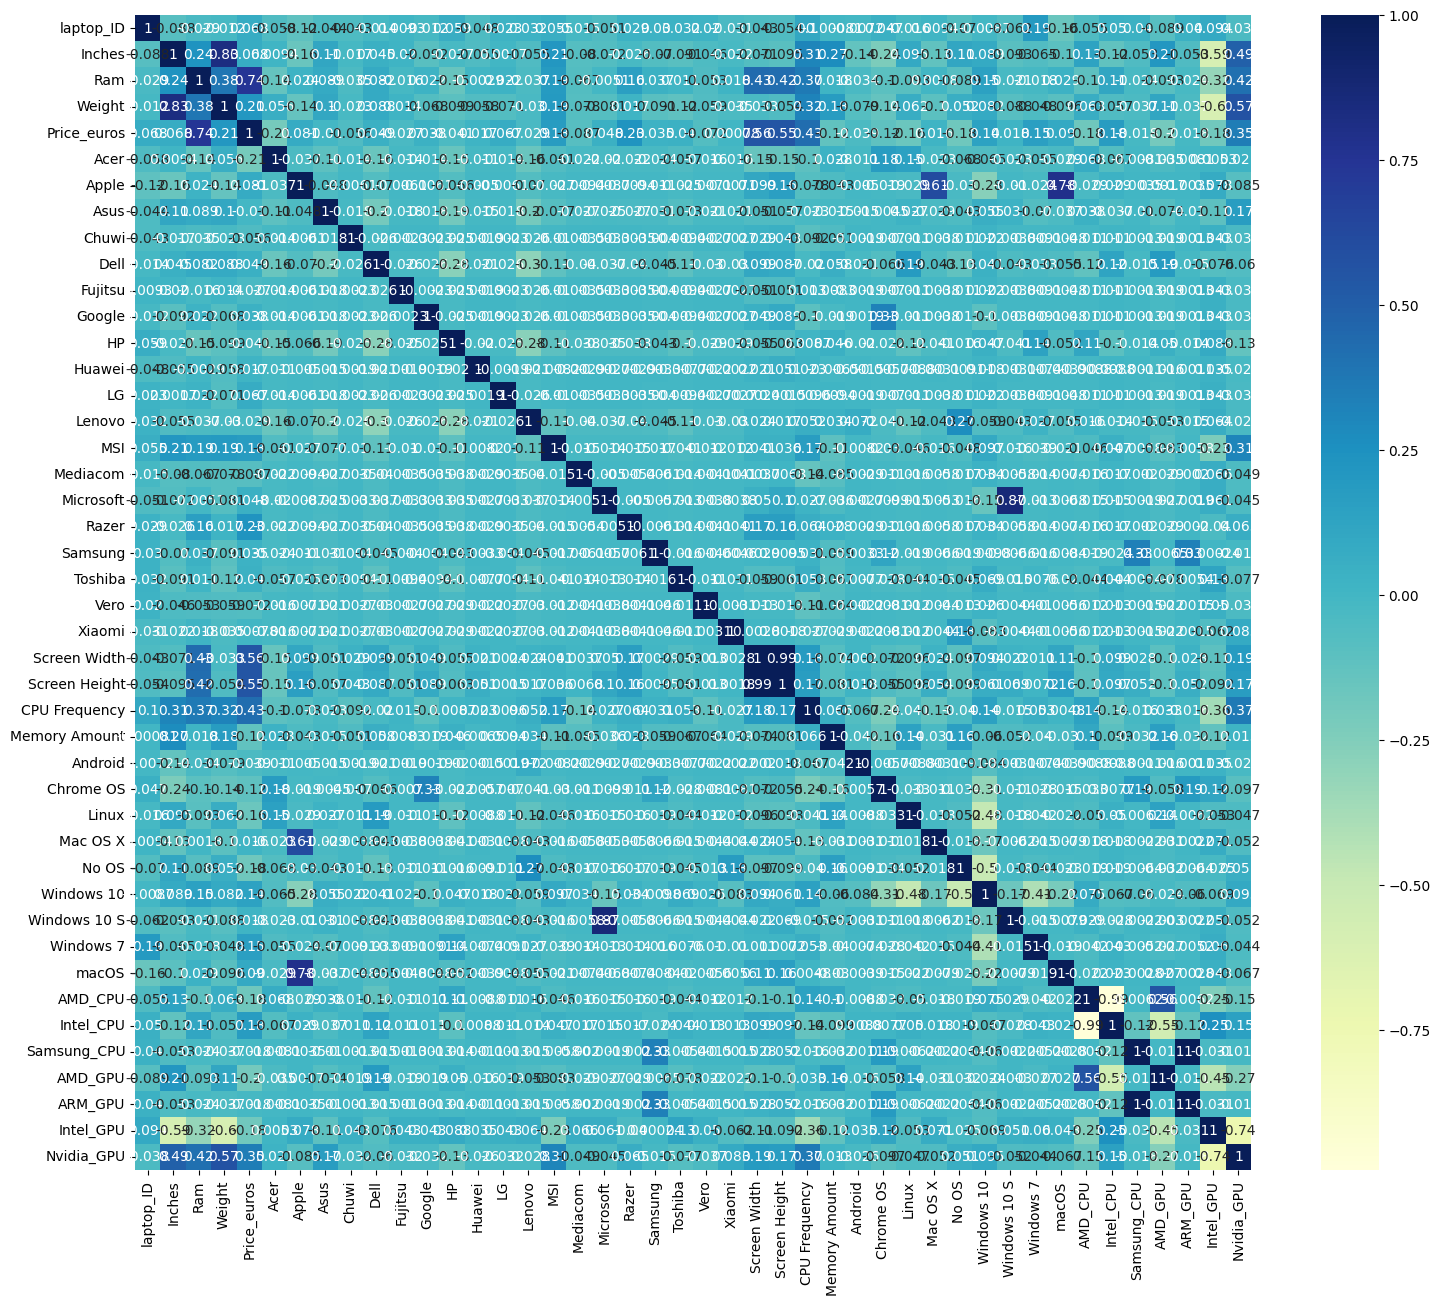

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [28]:
target_correlations = df.corr()['Price_euros'].apply(abs).sort_values()

/tmp/ipykernel_7221/249403010.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_correlations = df.corr()['Price_euros'].apply(abs).sort_values()


In [29]:
target_correlations

Xiaomi           0.000776
Asus             0.010376
Mac OS X         0.015656
Huawei           0.016851
Windows 10 S     0.018312
ARM_GPU          0.018431
Samsung_CPU      0.018431
Fujitsu          0.027135
Lenovo           0.029007
Samsung          0.034584
Google           0.038086
Android          0.038700
Toshiba          0.040339
HP               0.041291
Microsoft        0.047562
Dell             0.048509
Chuwi            0.055646
LG               0.067053
laptop_ID        0.067830
Inches           0.068197
Vero             0.071972
Apple            0.080688
Mediacom         0.087161
macOS            0.089928
Chrome OS        0.118684
Memory Amount    0.122365
Windows 10       0.137048
Windows 7        0.152381
Linux            0.162060
No OS            0.177094
MSI              0.180100
AMD_CPU          0.180111
Intel_CPU        0.181127
Intel_GPU        0.184205
AMD_GPU          0.199415
Acer             0.208349
Weight           0.210370
Razer            0.233756
Nvidia_GPU  

In [34]:
selected_features = target_correlations[-21:].index

In [35]:
selected_features = list(selected_features)

In [36]:
selected_features

['macOS',
 'Chrome OS',
 'Memory Amount',
 'Windows 10',
 'Windows 7',
 'Linux',
 'No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Razer',
 'Nvidia_GPU',
 'CPU Frequency',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price_euros']

In [37]:
limited_df = df[selected_features]

In [38]:
limited_df

,macOS,Chrome OS,Memory Amount,Windows 10,Windows 7,Linux,No OS,MSI,AMD_CPU,Intel_CPU,...,AMD_GPU,Acer,Weight,Razer,Nvidia_GPU,CPU Frequency,Screen Height,Screen Width,Ram,Price_euros
0,1,0,128000.0,0,0,0,0,0,0,1,...,0,0,1.37,0,0,2.3,1600,2560,8,1339.69
1,1,0,128000.0,0,0,0,0,0,0,1,...,0,0,1.34,0,0,1.8,900,1440,8,898.94
2,0,0,256000.0,0,0,0,1,0,0,1,...,0,0,1.86,0,0,2.5,1080,1920,8,575.00
3,1,0,512000.0,0,0,0,0,0,0,1,...,1,0,1.83,0,0,2.7,1800,2880,16,2537.45
4,1,0,256000.0,0,0,0,0,0,0,1,...,0,0,1.37,0,0,3.1,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,128000.0,1,0,0,0,0,0,1,...,0,0,1.80,0,0,2.5,1080,1920,4,638.00
1299,0,0,512000.0,1,0,0,0,0,0,1,...,0,0,1.30,0,0,2.5,1800,3200,16,1499.00
1300,0,0,64000.0,1,0,0,0,0,0,1,...,0,0,1.50,0,0,1.6,768,1366,2,229.00
1301,0,0,1000000.0,1,0,0,0,0,0,1,...,1,0,2.19,0,0,2.5,768,1366,6,764.00


<Axes: >

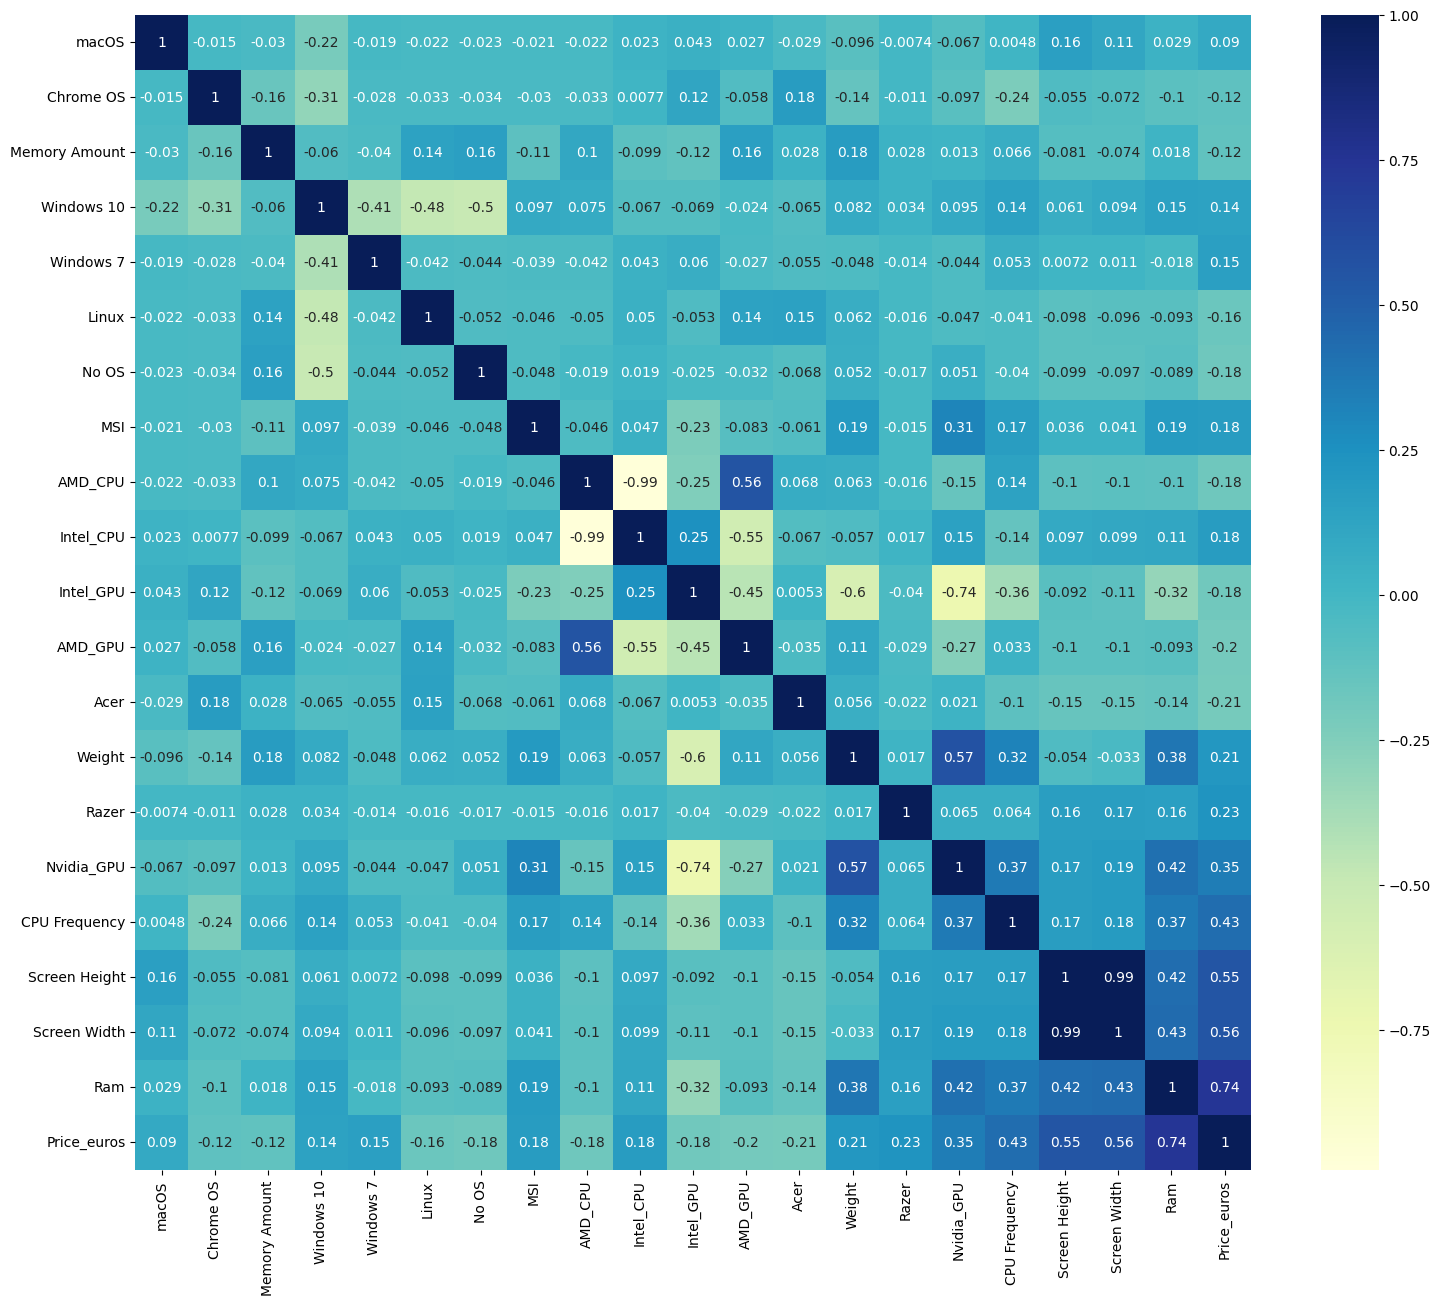

In [40]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
 
X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [44]:
forest = RandomForestRegressor()
forest.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [45]:
forest.score(x_test, y_test)

/home/bshimura/anaconda3/envs/neuralnine/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


-27.179572365049054

In [46]:
y_pred = forest.predict(x_test_scaled)

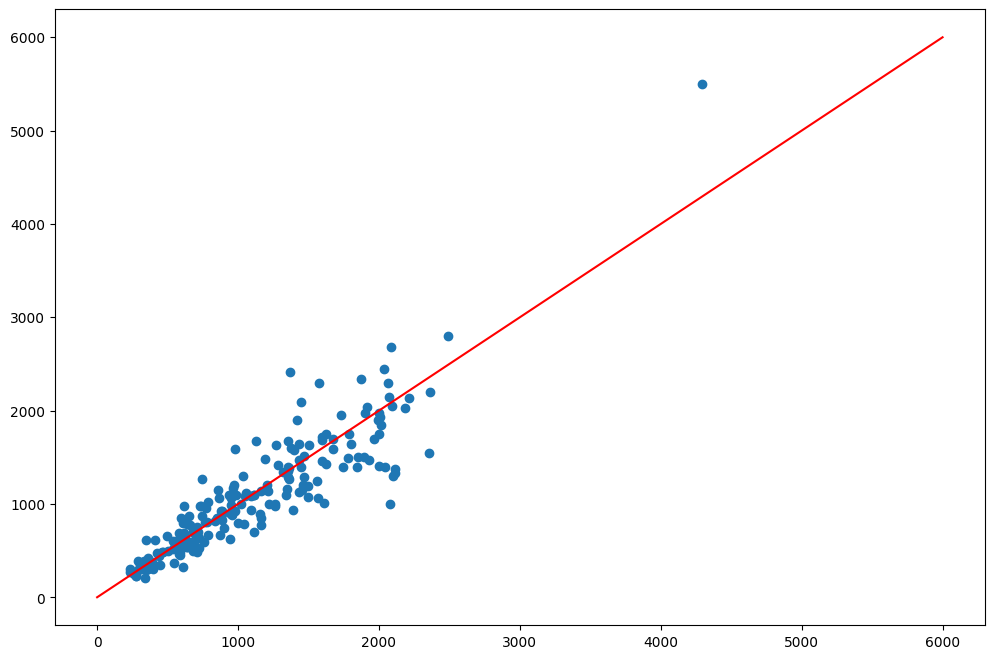

In [47]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")


In [49]:
x_new_scaled = scaler.transform([x_test.iloc[0]])

/home/bshimura/anaconda3/envs/neuralnine/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
forest.predict(x_new_scaled)

array([1799.1053])

In [51]:
y_test.iloc[0]

1637.0